In [1]:
from pydrive2.auth import GoogleAuth
from pydrive2.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [2]:
id='1qnY85yunm55aXBbDXY68o3BNn18zK6n0'
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('unict.txt.gz')

Importiamo le librerie necessarie per il nostro esercizio

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


Per questa esercitazione useremo [NetworkX](https://networkx.github.io), un pacchetto Python per la creazione, manipolazione e lo studio della strtuttura,della dinamica di reti complesse ([tutorial](https://networkx.org/documentation/stable/tutorial.html)).


Il dataset che analizzeremo è uno sottinsime del grafo del web centrato su [unict.it](https://unict.it), I nodi rappresentano pagine dell'Università di Catania e gli archi diretti rappresentano i link tra questi.

In [4]:
import networkx as nx

G = nx.read_edgelist('unict.txt.gz', create_using=nx.DiGraph)

In [5]:
def print_graph_info(G, directed=True):
  print("Numero di nodi:", len(G.nodes))
  print("Numero di archi:", len(G.edges))
  if directed:
    print("in-degree medio:", sum(dict(G.in_degree).values()) / len(G.nodes))
    print("out-degree medio:", sum(dict(G.out_degree).values()) / len(G.nodes))
  else:
    print("degree medio:", sum(dict(G.degree).values()) / len(G.nodes))

In [6]:
print_graph_info(G, True)

Numero di nodi: 4971
Numero di archi: 27460
in-degree medio: 5.524039428686381
out-degree medio: 5.524039428686381


# Esercizio (consegna 15 maggio)

* visualizare la distribuzione dei degree (in-degree e out-degree) in formato log-log.

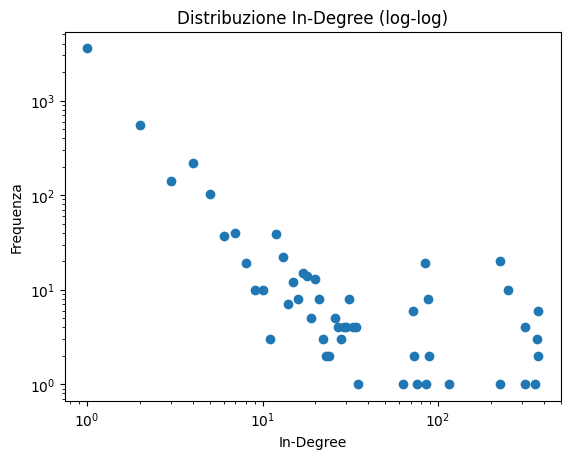

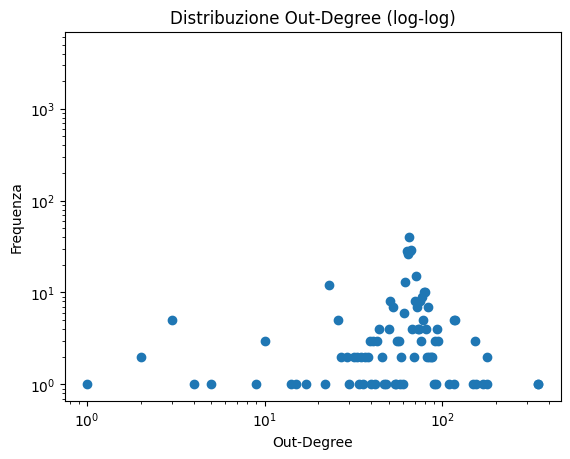

In [25]:
# 2. Visualize in- and out-degree distributions (log–log)
in_degs  = [d for _, d in G.in_degree()]
out_degs = [d for _, d in G.out_degree()]

# In-degree
plt.figure()
cnts = pd.Series(in_degs).value_counts().sort_index()
plt.loglog(cnts.index, cnts.values, marker='o', linestyle='')
plt.title("Distribuzione In-Degree (log-log)")
plt.xlabel("In-Degree")
plt.ylabel("Frequenza")
plt.show()

# Out-degree
plt.figure()
cnts = pd.Series(out_degs).value_counts().sort_index()
plt.loglog(cnts.index, cnts.values, marker='o', linestyle='')
plt.title("Distribuzione Out-Degree (log-log)")
plt.xlabel("Out-Degree")
plt.ylabel("Frequenza")
plt.show()

* Utilizzare NetworkX per identificare la componente debolmente connessa più grande del grafo G. D'ora in poi, utilizzare questa componente connessa per tutte le operazioni successive. D'ora in poi, si utilizzerà questa componente connessa per tutte le operazioni seguenti. [[Informazioni]](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.components.weakly_connected_components.html)


Stampare le sue informazioni.



In [13]:
# 3. Largest weakly connected component
wccs = list(nx.weakly_connected_components(G))
largest = max(wccs, key=len)
G_lcc = G.subgraph(largest).copy()
print("→ Component debolmente connessa più grande:")
print_graph_info(G_lcc, directed=True)

→ Component debolmente connessa più grande:
Numero di nodi: 4971
Numero di archi: 27460
in-degree medio: 5.524039428686381
out-degree medio: 5.524039428686381


* Calcoare il vettore di PageRank con i parametri di default in  NetworkX: [https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.link_analysis.pagerank_alg.pagerank.html#networkx.algorithms.link_analysis.pagerank_alg.pageranky](https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.link_analysis.pagerank_alg.pagerank.html#networkx.algorithms.link_analysis.pagerank_alg.pagerank)

In [18]:
pr_original = nx.pagerank(G)

Utilizzare il modello di Barabási e Albert (rete scale-free) per generare grafi con proprietà topologiche simili al grafo del Web.

Se completate i passaggi seguenti, dovreste ottenere una prova empirica che il modello Random Graph è inferiore al modello di Barabási-Albert quando si tratta di generare un grafo simile al World Wide Web!

Per questo motivo, utilizzeremo due diversi metodi di generazione di grafi e poi verificheremo quanto bene essi approssimano la struttura del grafo del Web, confrontando i rispettivi vettori PageRank. [[Generatori di grafi di NetworkX]]
(https://networkx.github.io/documentation/stable/reference/generators.html#)


Utilizzando i parametri seed = 1 e directed=False, ove applicabile, generare:


1. un grafo casuale (con il metodo veloce), impostando n pari al numero di nodi della componente connessa originale e p = 0,00008
2. un grafo di Barabasi-Albert (con il metodo standard), ponendo n uguale al numero di nodi della componente connessa originale e trovando il giusto valore intero per m in modo che il numero di archi risultante approssimi per eccesso (il valore più vicino e soddisfacente ≥ ) il numero di archi della componente connessa originale (la più grande componente debolmente connessa ottenuta in precedenza)
e calcolare i vettori PageRank per entrambi i grafi. Stampare le informazioni del grafo generato.

In [27]:
# 5. Generate comparison graphs on n = |largest component|
n = G_lcc.number_of_nodes()

# 5.1 Random G(n,p)
p = 0.00008
G_rand = nx.fast_gnp_random_graph(n, p, seed=1, directed=False)
print("\nGrafo casuale G_rand:")
print_graph_info(G_rand, directed=False)

# 5.2 Barabási–Albert G(n,m) with m ≈ (average degree)/2
avg_deg = np.mean([d for _, d in G_lcc.to_undirected().degree()])
m = max(1, int(round(avg_deg / 2)))
G_ba = nx.barabasi_albert_graph(n, m, seed=1)
print("\nGrafo Barabási–Albert G_ba:")
print_graph_info(G_ba, directed=False)


Grafo casuale G_rand:
Numero di nodi: 4971
Numero di archi: 953
degree medio: 0.3834238583785959

Grafo Barabási–Albert G_ba:
Numero di nodi: 4971
Numero di archi: 24830
degree medio: 9.989941661637497


Confrontate i vettori PageRank ottenuti sui grafi generati con il vettore PageRank calcolato sulla componente connessa originale. Ordinare le componenti di ciascun vettore per valore e utilizzare la similarità del coseno come misura di similarità.

Sentitevi liberi di utilizzare qualsiasi implementazione della similarità del coseno disponibile in librerie o di implementare la vostra con numpy.



In [24]:
# 6. PageRank on the generated graphs
pr_original = nx.pagerank(G)
pr_rand = nx.pagerank(G_rand)
pr_ba   = nx.pagerank(G_ba)

# 7. Cosine similarity between pr_rand and pr_ba
from numpy.linalg import norm
v_original = np.array([pr_original[i] for i in sorted(G.nodes())])
v_rand = np.array([pr_rand[i] for i in sorted(G_rand.nodes())])
v_ba = np.array([pr_ba[i] for i in sorted(G_ba.nodes())])
def cos_sim(a, b):
  return np.dot(a, b) / (norm(a) * norm(b))
print(f"\nSimilarità del coseno tra PageRank(G_rand) e PageRank(G_ba): {cos_sim(v_rand, v_ba):.4f}")
print(f"\nSimilarità del coseno tra PageRank(G) e PageRank(G_ba): {cos_sim(v_original, v_ba):.4f}")
print(f"\nSimilarità del coseno tra PageRank(G) e PageRank(G_rand): {cos_sim(v_original, v_rand):.4f}")


Similarità del coseno tra PageRank(G_rand) e PageRank(G_ba): 0.5078

Similarità del coseno tra PageRank(G) e PageRank(G_ba): 0.6278

Similarità del coseno tra PageRank(G) e PageRank(G_rand): 0.5745
